In [42]:
import cv2
import numpy as np
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

## 比较CCL和CT获取孔洞信息的速度

In [43]:
def ct_get_location(fpath):
    # 读取图像
    img = cv2.imread(fpath)

    # 灰度化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 二值化
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # 查找轮廓
    start_time = time.time()
    contours, hierarchy = cv2.findContours(thresh,  cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # 遍历轮廓并输出包围盒位置信息
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        # print(f"连通组件 {i+1} 的位置为：({x}, {y}), 宽度为 {w}, 高度为 {h}")
    end_time = time.time()
    # print(f"CT程序运行时间为：{end_time - start_time:.4f} 秒")
    return end_time - start_time




In [44]:
def ccl_get_location(fpath):

    # 读取图像
    img = cv2.imread(fpath)

    # 灰度化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 二值化
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # 使用CCL方法查找连通组件
    start_time = time.time()
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=4, ltype=cv2.CV_32S)
    end_time = time.time()

    # # 遍历每个连通组件，并输出其位置信息
    # for i in range(1, num_labels):
    #     x, y, w, h, area = stats[i]
        # print(f"连通组件 {i} 的位置为：({x}, {y}), 宽度为 {w}, 高度为 {h}")

    # 输出程序运行时间
    # print(f"CCL程序运行时间为：{end_time - start_time:.4f} 秒")
    return end_time - start_time



In [45]:
def gt_path2fd_jpg_path_batch(node_list, degree_list, file_dir):
    '''
    Convert the file name of ground truth jpg file to fd algorithm file
    Returns: dictionary key=fd path, value=[gt inner, gt outer, area_min]
    '''
    # ../../../Data/jpg/jpg_gt_files/Uniform/n=200d=10.jpg
    

In [46]:
def get_time_csv(node_list, degree, fd_folder):
    fpath_list = []
    for num in node_list:
        for root, dirs, files in os.walk(fd_folder): 
            for file in files: 
                if str(num)+"d="+str(degree) in os.path.splitext(file)[0]: 
                    # print(os.path.join(root,file))
                    fpath_list.append(os.path.join(root,file))
    ct_list = []
    ccl_list = []
    for path in fpath_list:
        # print("file name = " + path)
        ct_time = ct_get_location(path)
        ccl_time = ccl_get_location(path)
        ct_list.append(ct_time)
        ccl_list.append(ccl_time)
    return ct_list, ccl_list
    

In [47]:
def draw_speed_line_chart_in_same_degree(_type, _degree, ct_list, ccl_list):
    nodes_number_list = [200, 500, 1000, 2000, 3000]
    y1 = ct_list
    y2 = ccl_list
    # Plot the curves
    plt.plot(nodes_number_list, y1, label='CT_Time')
    plt.plot(nodes_number_list, y2, label='CCL_Time')
    plt.xticks(nodes_number_list)
    # Add a title and legend
    plt.title('Type=' + str(_type) + ', Degree=' + str(_degree))
    plt.legend()
    fname = "Type="+_type+"_d="+str(_degree)+"_Location_PT.pdf"

    plt.savefig(os.path.join("LineCharts",fname),bbox_inches ="tight") 
    # Show the chart
    plt.show()

In [48]:
def draw_speed_bar_in_same_degree(_type, _degree, ct_list, ccl_list, total_width=0.8, n=2):
    target_path = "Bars"
    nodes_number_value = [200, 500, 1000, 2000, 3000]
    x=np.arange(5)#柱状图在横坐标上的位置
    width = total_width / n
    x = x - (total_width - width) / 2
    # fname = "Type="+_type+"_d="+str(_degree)+"_FD="+fd+".pdf"
    fname = "Type="+_type+"_d="+str(_degree)+".pdf"
    plt.bar(x + width/2, ct_list,  width=width, label='FD-CT Time')
    plt.bar(x+width/2+width, ccl_list, width=width, label='FD-CCL Time')
    # plt.bar(x+width*2, ct, width=width, label='CT')
    # 功能2
    for i, j in zip(x + width/2, ct_list):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)
    for i, j in zip(x+width/2+width, ccl_list):
        plt.text(i, j + 0.01, "%.2f" % j, ha="center", va="bottom", fontsize=7)

    plt.legend()
    plt.xticks(x+total_width/2,nodes_number_value)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
    # plt.title("Type="+_type+", degree="+str(_degree)+", FD algorithm="+fd)
    plt.title("Type="+_type+", Degree="+str(_degree))

    plt.ylabel('Processing Time(s)')
    plt.xlabel('Number of Nodes')
    plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight", pad_inches = 1,transparent = True) 
    # plt.savefig(os.path.join(target_path, fname),bbox_inches ="tight") 
    plt.show()

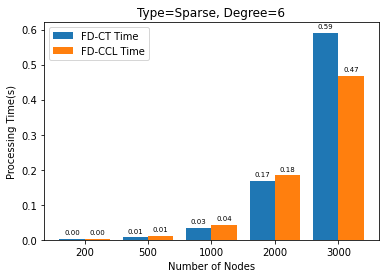

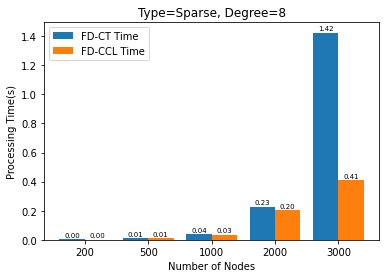

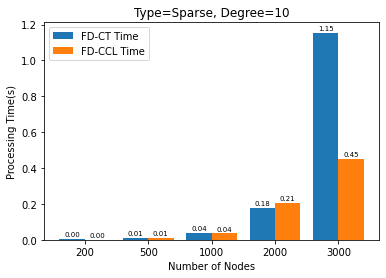

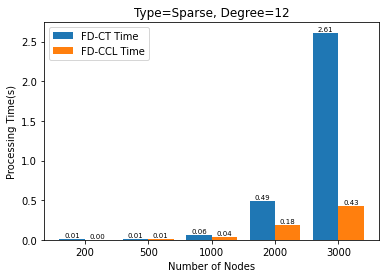

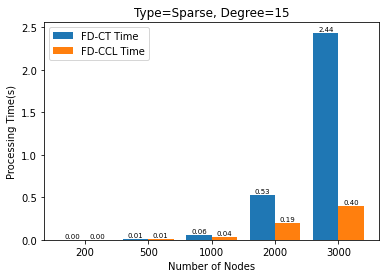

In [49]:
node_list = [200, 500, 1000, 2000, 3000]
for degree in [6, 8, 10, 12, 15]:
    ct_list, ccl_list = get_time_csv(node_list, degree, "FA2")
    # draw_speed_line_chart_in_same_degree("Sparse", degree, ct_list, ccl_list)
    draw_speed_bar_in_same_degree("Sparse", degree, ct_list, ccl_list)
